In [4]:
import pandas as pd


In [9]:
df = pd.read_csv(r'C:\Users\MARYAM\Desktop\DBT\diabetes.csv')
print(df.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [10]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


describe is a useful method in pandas that provides summary statistics of a DataFrame. When called, it gives a quick overview of the central tendency, dispersion, and shape of the dataset's distribution for numerical colum

In [11]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [13]:
print(df.dtypes)

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


# DATA CLEANING

In [14]:
# Display the DataFrame info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [15]:
print(df.isnull().sum())  # Check for missing values in each column


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


Removing Duplicates:

In [16]:
print(df.duplicated().sum())  # Count duplicate rows


0


renaming columns

In [17]:
df.rename(columns={'DiabetesPedigreeFunction': 'DPF'}, inplace=True)

In [18]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DPF', 'Age', 'Outcome'],
      dtype='object')

In [19]:
print(df.shape)

(768, 9)


 # DATA MANUPULATION

Data manipulation is a key aspect of data analysis, allowing you to filter, sort, and group your data for deeper insights. Below are examples of how to filter rows, sort data, and group data in a DataFrame using pandas, along with explanations for each operation.

FILTER

In [20]:
# Select the first 4 rows and the first 2 columns (positionally)
df.iloc[0:4, 0:2]

,Pregnancies,Glucose
0,6,148
1,1,85
2,8,183
3,1,89


In [21]:
#  Filter rows where Age > 30 and Glucose < 150
df_filtered = df[(df['Age'] > 30) & (df['Glucose'] < 150)]

print(df_filtered)


     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI    DPF  \
0              6      148             72             35        0  33.6  0.627   
1              1       85             66             29        0  26.6  0.351   
4              0      137             40             35      168  43.1  2.288   
9              8      125             96              0        0   0.0  0.232   
12            10      139             80              0        0  27.1  1.441   
..           ...      ...            ...            ...      ...   ...    ...   
756            7      137             90             41        0  32.0  0.391   
757            0      123             72              0        0  36.3  0.258   
762            9       89             62              0        0  22.5  0.142   
763           10      101             76             48      180  32.9  0.171   
766            1      126             60              0        0  30.1  0.349   

     Age  Outcome  
0     5

sorting

In [22]:
# Sort by the 'Age' column in ascending order
df_sorted = df.sort_values(by='Age')

print(df_sorted)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI    DPF  \
736            0      126             86             27      120  27.4  0.515   
738            2       99             60             17      160  36.6  0.453   
721            1      114             66             36      200  38.1  0.289   
60             2       84              0              0        0   0.0  0.304   
290            0       78             88             29       40  36.9  0.434   
..           ...      ...            ...            ...      ...   ...    ...   
123            5      132             80              0        0  26.8  0.186   
684            5      136             82              0        0   0.0  0.640   
666            4      145             82             18        0  32.5  0.235   
453            2      119              0              0        0  19.6  0.832   
459            9      134             74             33       60  25.9  0.460   

     Age  Outcome  
736   2

SORTING MULTIPLE

In [23]:
# Sort by 'Age' first and then by 'BMI'
df_sorted = df.sort_values(by=['Age', 'BMI'])

print(df_sorted)


     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI    DPF  \
60             2       84              0              0        0   0.0  0.304   
145            0      102             75             23        0   0.0  0.572   
371            0      118             64             23       89   0.0  1.731   
438            1       97             70             15        0  18.2  0.147   
526            1       97             64             19       82  18.2  0.299   
..           ...      ...            ...            ...      ...   ...    ...   
684            5      136             82              0        0   0.0  0.640   
123            5      132             80              0        0  26.8  0.186   
666            4      145             82             18        0  32.5  0.235   
453            2      119              0              0        0  19.6  0.832   
459            9      134             74             33       60  25.9  0.460   

     Age  Outcome  
60    2

# Data Visualization

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

 Scatter Plot 

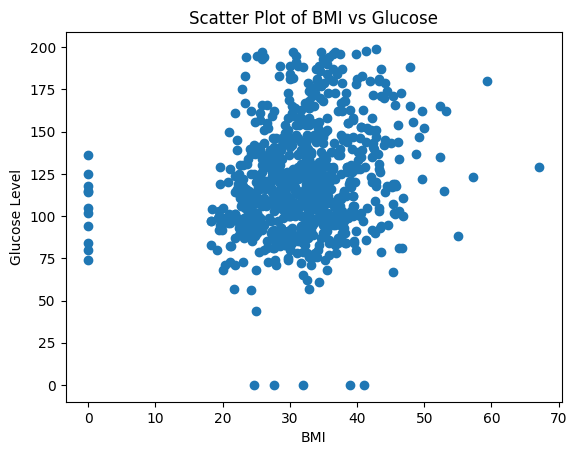

In [27]:
# Scatter Plot of BMI vs. Glucose
plt.scatter(df['BMI'], df['Glucose'])
plt.title('Scatter Plot of BMI vs Glucose')
plt.xlabel('BMI')
plt.ylabel('Glucose Level')
plt.show()

BAR CHART

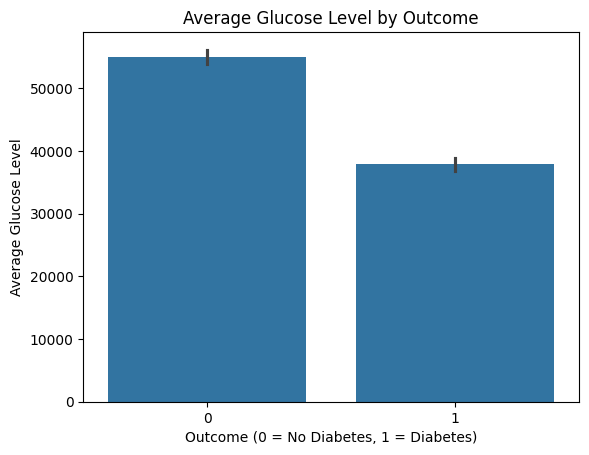

In [28]:
# Bar chart of average Glucose by Outcome
sns.barplot(x='Outcome', y='Glucose', data=df, estimator=sum)
plt.title('Average Glucose Level by Outcome')
plt.xlabel('Outcome (0 = No Diabetes, 1 = Diabetes)')
plt.ylabel('Average Glucose Level')
plt.show()

# HISTOGRAM

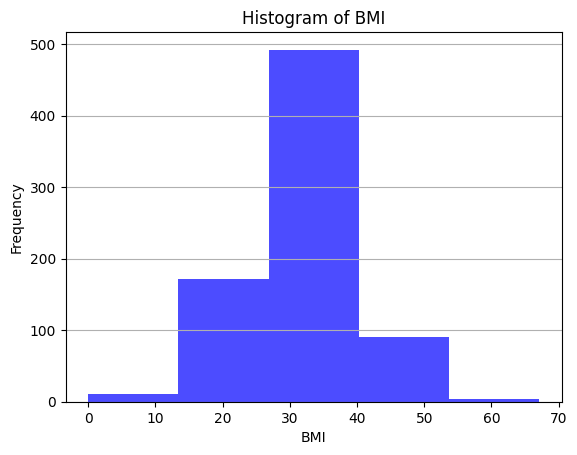

In [29]:
# Histogram of BMI
plt.hist(df['BMI'], bins=5, color='blue', alpha=0.7)
plt.title('Histogram of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

# HEATMAP

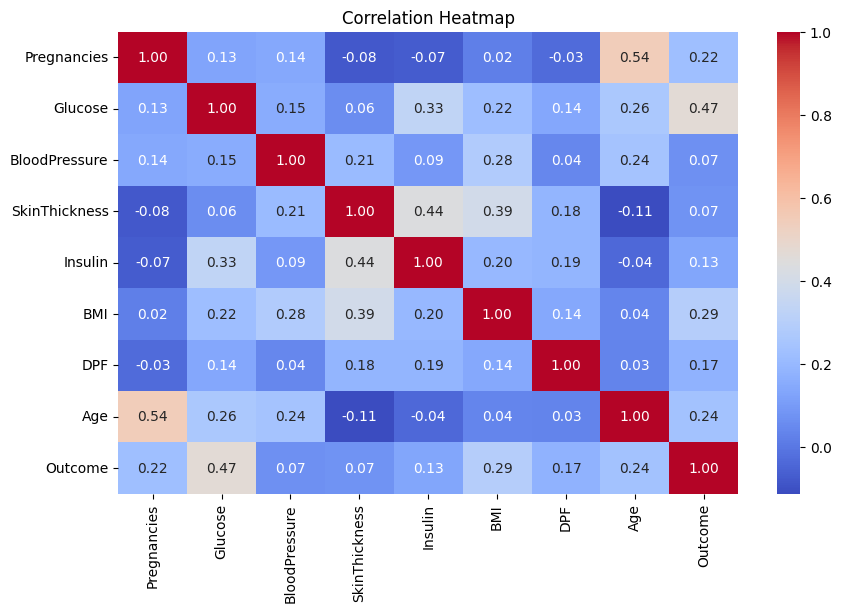

In [30]:
# Heatmap of correlations
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

 # BOX PLOT

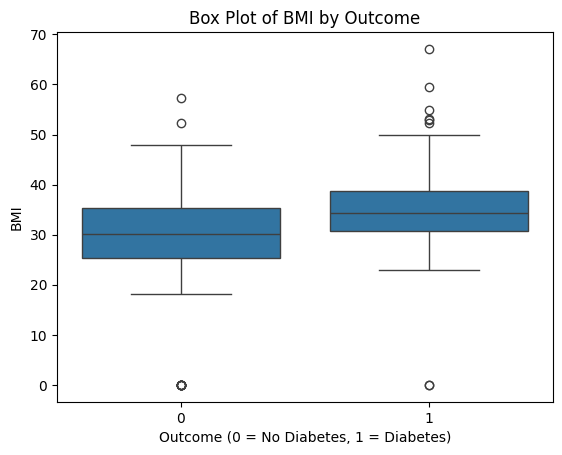

In [31]:
# Box plot of BMI by Outcome
sns.boxplot(x='Outcome', y='BMI', data=df)
plt.title('Box Plot of BMI by Outcome')
plt.xlabel('Outcome (0 = No Diabetes, 1 = Diabetes)')
plt.ylabel('BMI')
plt.show()

# Statistical Analysis

Descriptive Statistics Descriptive statistics summarize and describe the features of a dataset. Common measures include:
Mean: The average value. Median: The middle value when data is sorted. Mode: The most frequently occurring value. Variance: The measure of the data's spread. Standard Deviation: The square root of the variance.

In [32]:
# Sample dataset
data = {
    'BMI': [22.0, 25.0, 30.0, 28.0, 35.0],
    'Glucose': [80, 95, 130, 110, 200]
}

# Create DataFrame
df = pd.DataFrame(data)

# Descriptive statistics
mean_bmi = df['BMI'].mean()
median_bmi = df['BMI'].median()
mode_bmi = df['BMI'].mode()[0]  # Get the first mode
variance_bmi = df['BMI'].var()
std_dev_bmi = df['BMI'].std()

print("Descriptive Statistics for BMI:")
print(f"Mean: {mean_bmi}")
print(f"Median: {median_bmi}")
print(f"Mode: {mode_bmi}")
print(f"Variance: {variance_bmi}")
print(f"Standard Deviation: {std_dev_bmi}")

Descriptive Statistics for BMI:
Mean: 28.0
Median: 28.0
Mode: 22.0
Variance: 24.5
Standard Deviation: 4.949747468305833


 # Inferential Statistics

Inferential statistics allow us to make inferences or predictions about a population based on a sample of data. One common method is hypothesis testing.

Hypothesis Testing Example Let’s perform a simple t-test to compare the means of two groups.

In [36]:
from scipy import stats

# Sample data for two groups
group1 = [22.0, 25.0, 30.0, 28.0, 35.0]  # Group A
group2 = [25.0, 27.0, 29.0, 31.0, 33.0]  # Group B

# Perform a t-test
t_statistic, p_value = stats.ttest_ind(group1, group2)

print("T-test results:")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Interpretation
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the two groups.")
else:
    print("Fail to reject the null hypothesis: No significant difference between the groups.")

T-test results:
T-statistic: -0.3806934938134405
P-value: 0.7133405267739914
Fail to reject the null hypothesis: No significant difference between the groups.


Explanation of the Code Descriptive Statistics: We created a DataFrame using pandas and calculated the mean, median, mode, variance, and standard deviation for the BMI column. Inferential Statistics: We used the scipy.stats module to conduct a t-test comparing the means of two groups. The p_value is compared to a significance level (alpha). If the p_value is less than alpha, we reject the null hypothesis, indicating a significant difference between the two groups.


[ ]
